# Importing Modules

In [1]:
import import_ipynb
import CFAR as cfar
import GeoProcess as gp
import numpy as np
import imageResizing as ir

DATA_PATH = 'Dataset_963A/'

importing Jupyter notebook from CFAR.ipynb
importing Jupyter notebook from GeoProcess.ipynb
importing Jupyter notebook from imageResizing.ipynb


In [2]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VV.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
#print(rows,col)
#gp.visualizeImg(band_data_arr)

(750, 750)
Image Saved Succesfully.


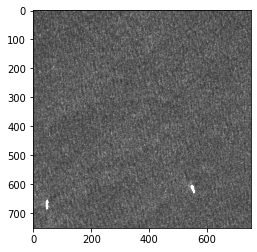

In [7]:
#subset_img = (gp.subsetImg(band_data_arr,4500,5700),5) #single ship
subset_img = gp.subsetImg(band_data_arr,4950,5700) #multiple ship.

#subset_img = band_data_arr[5853:5888,4594:4621]
#subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [8]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 15
guardWindow_size = 5
targetWindow_size = 3
kernel = 5
pfa = 0.995

In [9]:
cfar_filter = cfar.CFAR(subset_img,backgroundWindow_size,guardWindow_size,targetWindow_size,pfa,kernel)

finalImg = cfar_filter.Shipdetection()

Kernel Ready...
ShipDetection Procecss has started...
Computing DVI and noise...
Process Completed.


Image Saved Succesfully.


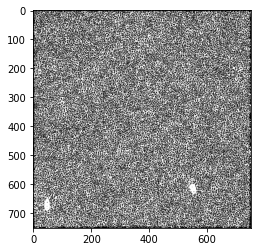

In [10]:
gp.visualizeBinaryImg(finalImg)
gp.save_img2Geotiff(finalImg,'Dataset_963A/CFARResults/Output_'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

In [ ]:
p_img = np.array(P_img).reshape(subset_img.shape) 
gp.visualizeImg(p_img)
print(p_img)

In [ ]:
dvi_img = np.array(Dvi_img).reshape(subset_img.shape)
gp.visualizeBinaryImg(dvi_img)
print(dvi_img)
gp.save_img2Geotiff(dvi_img,'Dataset_963A/CFARResults/DviImg.tif')